In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.utils import resample
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

In [3]:
df=pd.read_csv("mcdonalds.csv")


In [6]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [16]:
column_names=df.columns.tolist()


In [14]:
print(column_names)

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [17]:
df.shape

(1453, 15)

In [18]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [4]:
MD_x=df.iloc[: ,0:11].replace("Yes",1).replace("No",0)
mean=round(MD_x.mean(),2)
mean

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [110]:

pca=PCA()
MD_pca=pca.fit_transform(MD_x)
MD_p=pca.fit(MD_x)
explained_variance_ratio=pca.explained_variance_ratio_
cumulative_variance=np.cumsum(explained_variance_ratio)
Standard_Deviation=np.sqrt(pca.explained_variance_)
index=[]
for i in range(len(Standard_Deviation)):
    i=i+1
    index.append("PC{}".format(i))
sum=pd.DataFrame({"Standard Deviation": Standard_Deviation,"Proportion of Variance": explained_variance_ratio, "Cumulative Proportion":cumulative_variance},index=index)
sum


,Standard Deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


In [43]:
explained_variance_ratio=pca.explained_variance_ratio_
components=pca.components_
print("EVR :")
print(explained_variance_ratio)
print("PC:")
print(components)

EVR :
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
PC:
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.3859

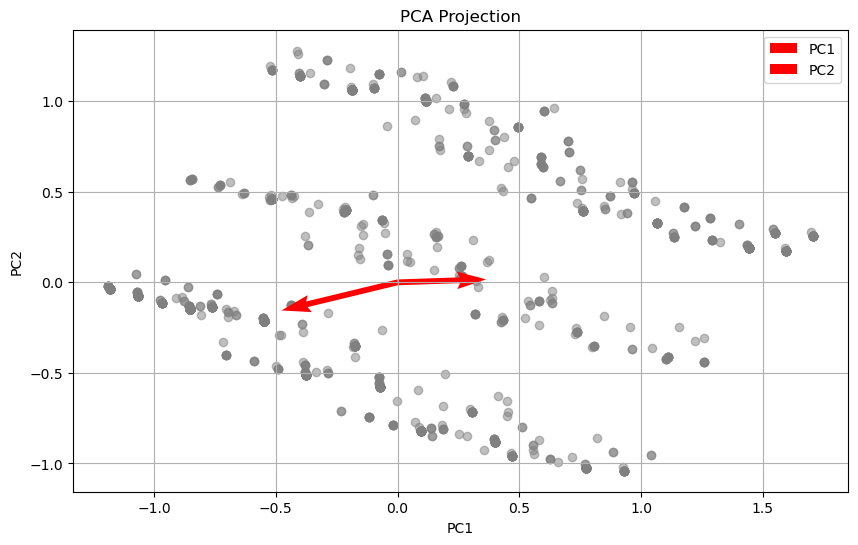

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(MD_pca[:,0],MD_pca[:,1],color="grey",alpha=0.5)
plt.title("PCA Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")

for i,vector in enumerate(pca.components_[:2]):
    plt.quiver(0,0,vector[0],vector[1],angles="xy",scale_units="xy",scale=1,color="red",label=f'PC{i+1}')
plt.legend()
plt.grid()
plt.show()

In [61]:
np.random.seed(1234)
k_range=range(2,9)
kmeans_results={}
n_reps = 10  # Number of repetitions

for k in k_range:
    best_labels = None
    best_inertia = np.inf
    for _ in range(n_reps):
        kmeans = KMeans(n_clusters=k, n_init=1, random_state=np.random.randint(0, 10000))
        kmeans.fit(MD_x)
        labels = kmeans.labels_
        inertia = kmeans.inertia_
        if inertia < best_inertia:
            best_inertia = inertia
            best_labels = labels
    kmeans_results[k]=best_labels
def relabel_clusters(labels):
    # Relabel clusters to have consistent labeling
    unique_labels = np.unique(labels)
    relabel_map = {old_label: new_label for new_label, old_label in enumerate(unique_labels)}
    return np.array([relabel_map[label] for label in labels])

# Apply relabeling
relabelled_results = {k: relabel_clusters(labels) for k, labels in kmeans_results.items()}

# Example of accessing and printing the results for k=3
k_example = 3
print(f"Cluster labels for k={k_example} (relabelled):")
print(relabelled_results[k_example])

Cluster labels for k=3 (relabelled):
[2 1 1 ... 1 0 2]


In [73]:
np.random.seed(1234)
k_range=range(1,9)
nboot=100
n_reps=10
bootstrap_results = {k: [] for k in k_range}

for k in k_range:
    print(f"Processing k={k}...")
    
    for _ in range(nboot):
        X_bootstrap,_= resample(MD_x.values,random_state=1234)
        
        

        kmeans_results = []
        for _ in range(n_reps):
            kmeans = KMeans(n_clusters=k, n_init=1, random_state=np.random.randint(0, 10000))
            kmeans.fit(X_bootstrap)
            kmeans_results.append(kmeans.labels_)
        
        
        most_common_labels = Counter([tuple(labels) for labels in kmeans_results]).most_common(1)[0][0]
        bootstrap_results[k].append(most_common_labels)


k_example = 3
print(f"\nBootstrap results for k={k_example}:")
print(np.array(bootstrap_results[k_example]))

Processing k=1...


ValueError: too many values to unpack (expected 2)

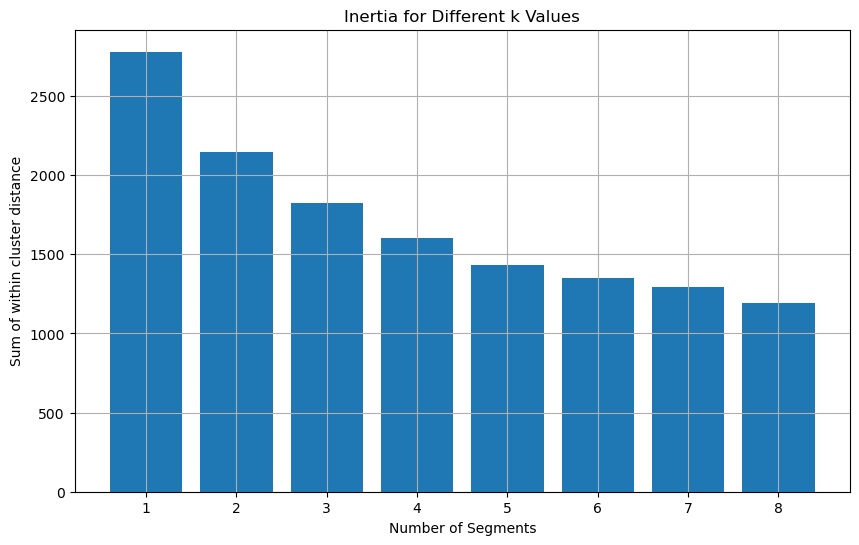

In [65]:
np.random.seed(1234)
k_range=range(1,9)


inertia_values = []
n_reps = 10  

for k in k_range:
    best_inertia = np.inf
    for _ in range(n_reps):
        kmeans = KMeans(n_clusters=k, n_init=1, random_state=np.random.randint(0, 10000))
        kmeans.fit(MD_x)
        inertia = kmeans.inertia_
        if inertia < best_inertia:
            best_inertia = inertia
    inertia_values.append(best_inertia)
plt.figure(figsize=(10, 6))
plt.bar(k_range, inertia_values)
plt.xlabel('Number of Segments')
plt.ylabel('Sum of within cluster distance')
plt.title('Inertia for Different k Values')
plt.xticks(k_range)
plt.grid(True)
plt.show()


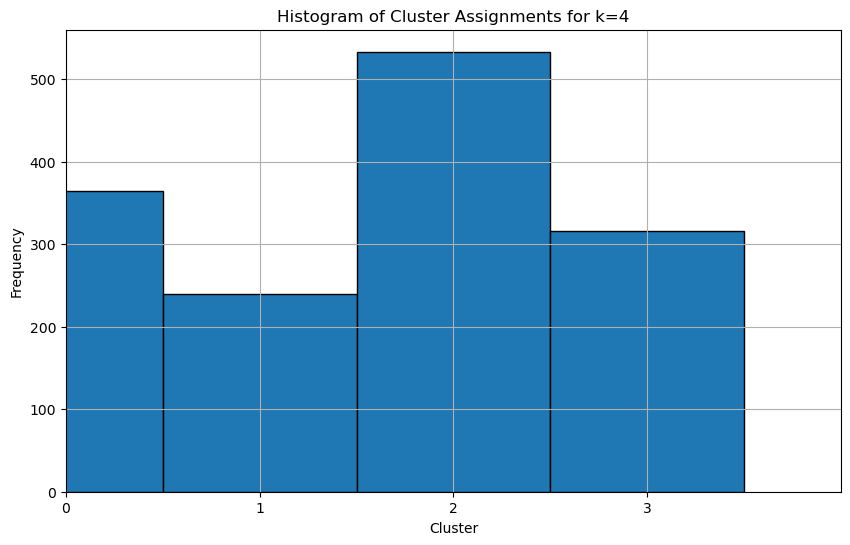

In [75]:
np.random.seed(1234)

k = 4
kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
kmeans.fit(MD_x)
labels = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.hist(labels, bins=np.arange(k + 1) - 0.5, edgecolor='black', range=(0, k))
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Histogram of Cluster Assignments for k=4')
plt.xlim(0, k)
plt.xticks(range(k))
plt.grid(True)
plt.show()

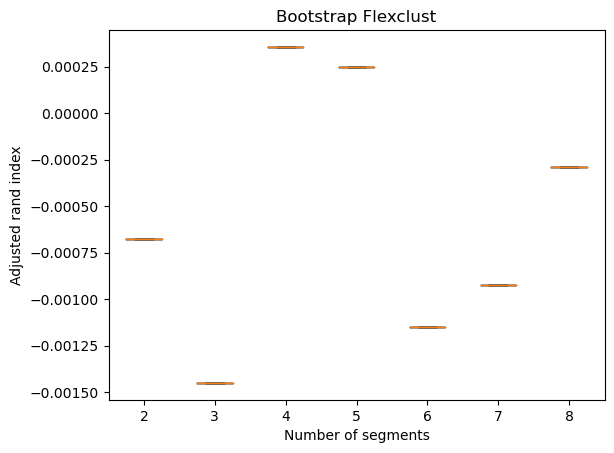

In [36]:
np.random.seed(1234)
nboot=100
nrep=10

bootstrap_samples=[]
for _ in range(nboot):
    bootstrap_sample=resample(MD_x.values,random_state=1234)
    bootstrap_samples.append(bootstrap_sample)
adjusted_rand_index= []
num_segments=range(2,9)
for k in num_segments:
    stability_scores=[]
    for bootstrap_sample in bootstrap_samples:
        kmeans=KMeans(n_clusters=k,n_init=nrep,random_state=1234)
        kmeans.fit(bootstrap_sample)
        cluster_labels=kmeans.predict(bootstrap_sample)
        true_labels=kmeans.predict(MD_x.values)
        stability_score=adjusted_rand_score(true_labels,cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)
adjusted_rand_index=np.array(adjusted_rand_index).T
plt.boxplot(adjusted_rand_index,labels=num_segments,whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted rand index")
plt.title("Bootstrap Flexclust")
plt.show()
    

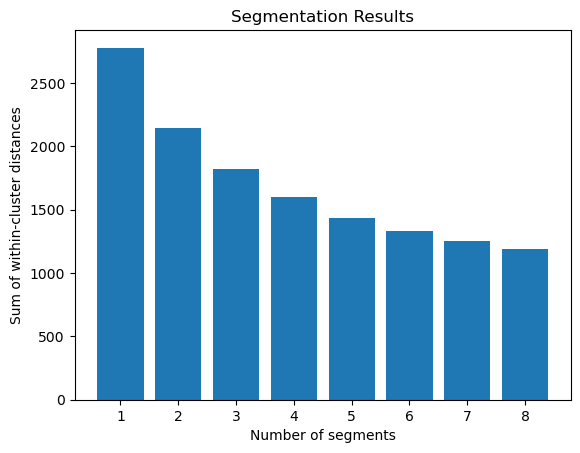

In [27]:
np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD_x)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()


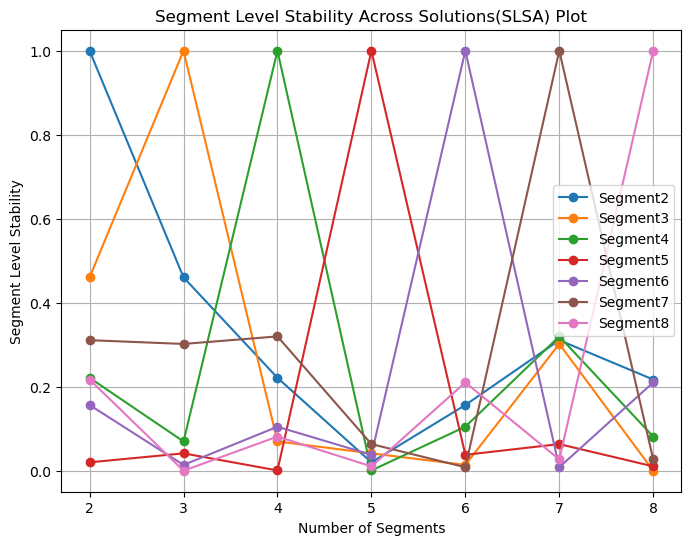

In [28]:
num_segments=range(2,9)
segment_stability=[]
for segment in range(2,9):
    labels_segment=MD_km28[str(segment)].predict(MD_x)
    segment_stability.append(labels_segment)
plt.figure(figsize=(8,6))
for i, segment in enumerate(range(2,9)):
    plt.plot(num_segments,[np.mean(segment_stability[i]==labels) for labels in segment_stability],marker="o",label=f'Segment{segment}')
plt.xlabel("Number of Segments")
plt.ylabel("Segment Level Stability")
plt.title("Segment Level Stability Across Solutions(SLSA) Plot")
plt.xticks(num_segments)
plt.legend()
plt.grid(True)
plt.show()

In [78]:
np.random.seed(1234)
k_range=range(2,9)
kmeans_results = {}

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    kmeans_results[k] = kmeans.labels_


k_value = 4
MD_k4 = kmeans_results.get(k_value)


print(f"Cluster assignments for k={k_value}:")
print(MD_k4)

Cluster assignments for k=4:
[0 3 3 ... 3 2 1]


In [82]:
np.random.seed(1234)
k = 4
kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
kmeans.fit(MD_x)
MD_k4 = kmeans.labels_


silhouette_avg = silhouette_score(MD_x, MD_k4)

print(f"Silhouette Score for k={k}: {silhouette_avg:.2f}")

Silhouette Score for k=4: 0.26


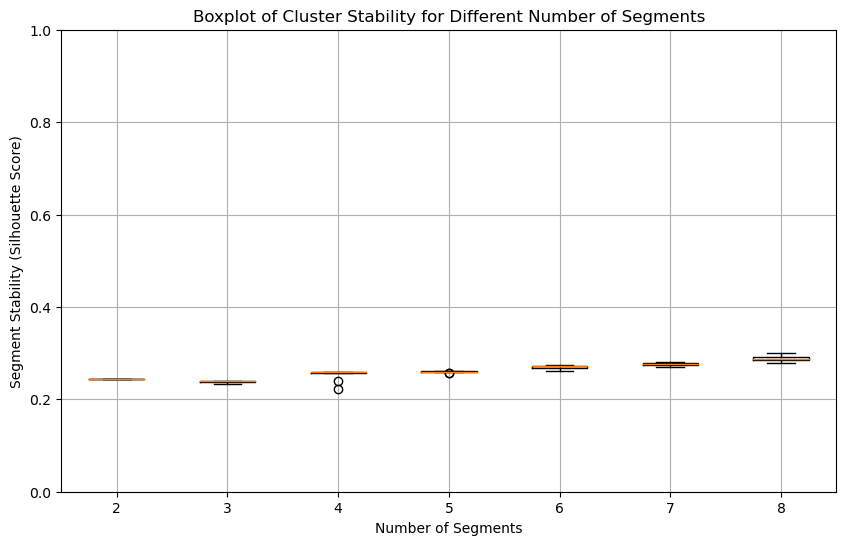

In [96]:
np.random.seed(1234)
k_range=range(2,9)
all_silhouette_scores = {k: [] for k in k_range}

n_reps = 10

for k in k_range:
    for _ in range(n_reps):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=np.random.randint(0, 10000))
        kmeans.fit(MD_x)
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(MD_x, labels)
        all_silhouette_scores[k].append(silhouette_avg)
boxplot_data = [all_silhouette_scores[k] for k in k_range]


plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=k_range)
plt.xlabel('Number of Segments')
plt.ylabel('Segment Stability (Silhouette Score)')
plt.title('Boxplot of Cluster Stability for Different Number of Segments')
plt.ylim(0, 1) 
plt.grid(True)
plt.show()


In [102]:
np.random.seed(1234)
k_range=range(2,9)
models={}
silhouette_scores={}
for k in k_range:
    print(f"Fitting model with k={k}...")
    gmm = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    gmm.fit(MD_x)
    models[k] = gmm
    labels = gmm.predict(MD_x)
    silhouette_avg = silhouette_score(MD_x, labels)
    silhouette_scores[k] = silhouette_avg
for k in k_range:
    print(f"\nModel for k={k}:")
    print(models[k])
    print(f"Silhouette Score for k={k}: {silhouette_scores[k]:.2f}")

Fitting model with k=2...
Fitting model with k=3...
Fitting model with k=4...
Fitting model with k=5...
Fitting model with k=6...
Fitting model with k=7...
Fitting model with k=8...

Model for k=2:
GaussianMixture(n_components=2, n_init=10, random_state=1234)
Silhouette Score for k=2: 0.19

Model for k=3:
GaussianMixture(n_components=3, n_init=10, random_state=1234)
Silhouette Score for k=3: 0.16

Model for k=4:
GaussianMixture(n_components=4, n_init=10, random_state=1234)
Silhouette Score for k=4: 0.19

Model for k=5:
GaussianMixture(n_components=5, n_init=10, random_state=1234)
Silhouette Score for k=5: 0.17

Model for k=6:
GaussianMixture(n_components=6, n_init=10, random_state=1234)
Silhouette Score for k=6: 0.23

Model for k=7:
GaussianMixture(n_components=7, n_init=10, random_state=1234)
Silhouette Score for k=7: 0.21

Model for k=8:
GaussianMixture(n_components=8, n_init=10, random_state=1234)
Silhouette Score for k=8: 0.20


*******************************************************

In [18]:
from scipy.stats import entropy
k_values=range(2,9)
MD_m28=[]
for k in k_values:
    model=KMeans(n_clusters=k, random_state=1234)
    model.fit(MD_x.values)
    iter_val=model.n_iter_
    converged=True
    k_val=k
    k0_val=k
    log_likelihood=-model.inertia_
    n_samples,_=MD_x.shape
    aic=-2*log_likelihood + 2 * k 
    bic=-2*log_likelihood + np.log(n_samples) * k
    labels=model.labels_
    counts=np.bincount(labels)
    probs=counts/float(counts.sum())
    class_entropy=entropy(probs)
    icl=bic-class_entropy
    MD_m28.append((iter_val,converged,k_val,k0_val,log_likelihood,aic,bic,icl))
MD_m28=pd.DataFrame(MD_m28,columns=["iter","converged","k","k0","logLik","AIC","BIC","ICL"])
print(MD_m28)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     8       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1     9       True  3   3 -1818.717659  3643.435318  3659.279475  3658.209672
2     7       True  4   4 -1602.986015  3213.972030  3235.097572  3233.753684
3    13       True  5   5 -1435.324786  2880.649571  2907.056500  2905.465473
4    10       True  6   6 -1332.150483  2676.300966  2707.989280  2706.201149
5    10       True  7   7 -1249.233890  2512.467780  2549.437480  2547.530062
6    10       True  8   8 -1191.580948  2399.161896  2441.412982  2439.379225


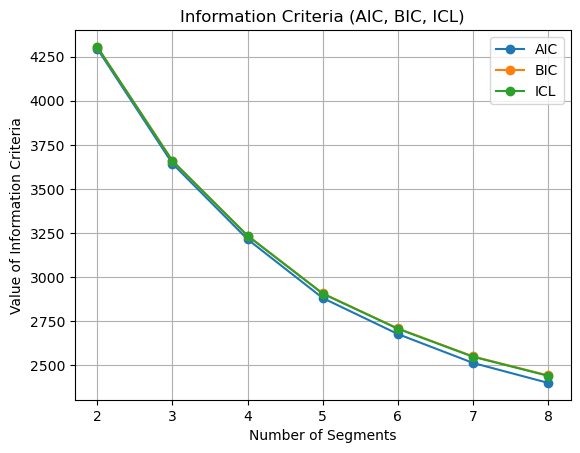

In [114]:
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()

In [117]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD_x)
kmeans_clusters = kmeans.predict(MD_x)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD_x)
gmm_clusters = gmm.predict(MD_x)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = MD_x[results['mixture'] == 3] 

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


mixture    0    1    2    3
kmeans                     
0         99    5  253    7
1          0  211   24    5
2        500    0    0   33
3         22   38    0  256
kmeans   0   1   2   3
kmeans                
0       29  10  17  23
1       18   8  12  11
2       45  14  31  19
3       29   5  15  15


In [118]:
from sklearn.mixture import GaussianMixture
import numpy as np

gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD_x)

log_likelihood_m4a = gmm_m4a.score(MD_x)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD_x)

log_likelihood_m4 = gmm_m4.score(MD_x)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: 9.456781748071885
Log-likelihood for MD.m4: 3.6427464011765815


In [120]:
like_counts = pd.value_counts(df['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [5]:
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

df['Like.n'] = df['Like'].map(like_mapping)


like_n_counts = df['Like.n'].value_counts()


print(like_n_counts)

Like.n
 0.0    169
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64


In [9]:
from patsy import dmatrices

independent_vars = df.columns[0:11] 

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


f = dmatrices(formula_str, data=df)[1]

print(f)


[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [11]:

from patsy import dmatrix
np.random.seed(1234)

X = dmatrix(f.design_info, data=df)
y = dmatrix('Like', data=df)

n_components = 2
n_init = 10
verbose = False
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
MD_reg2 = model.fit(X, y)

print(MD_reg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")


GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 985
2: 468


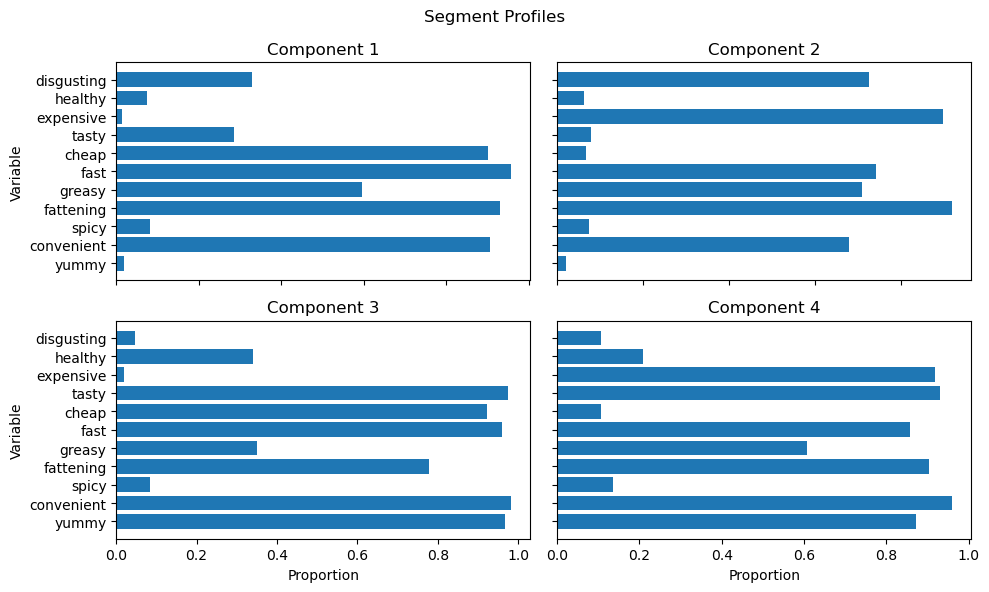

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

kmeans = MD_km28["4"]

labels = kmeans.labels_

MD_mean = MD_x.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD_x.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


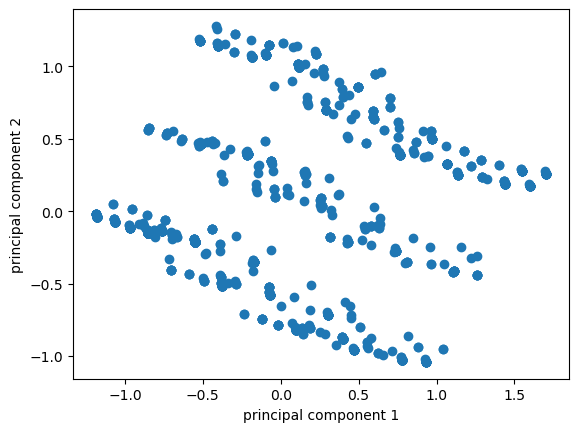

In [10]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4)
kmeans.fit(MD_x)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

fig, ax = plt.subplots()

ax.scatter(MD_pca[:, 0], MD_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

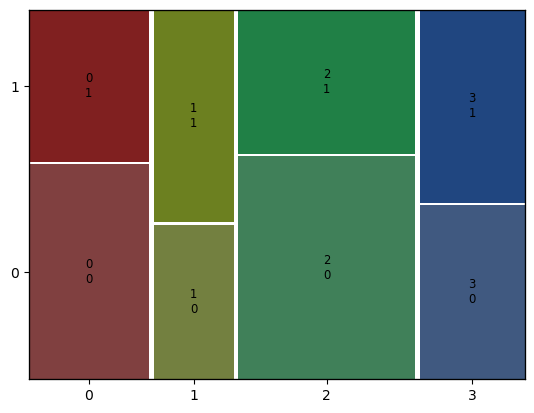

In [32]:
from statsmodels.graphics.mosaicplot import mosaic

MD_k4=MD_km28['4']
k4 = MD_k4.labels_

ct = pd.crosstab(k4, df['Gender'])
ct
mosaic(ct.stack(),gap=0.01)

plt.show()

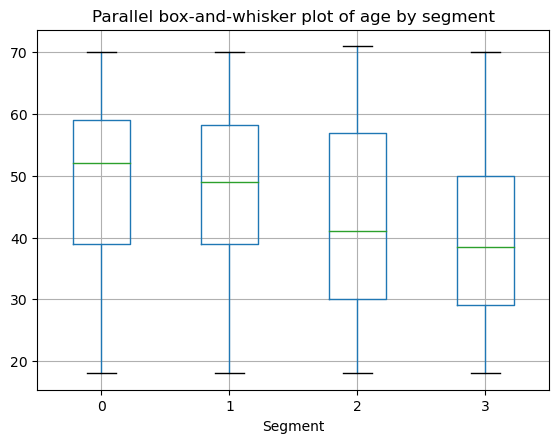

In [34]:
df = pd.DataFrame({'Segment': k4, 'Age': df['Age']})

df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

In [22]:
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.809061
1,1,2.584483
2,2,2.540123
3,3,2.679167


In [23]:
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,5.423948
1,1,3.794828
2,2,3.808642
3,3,6.775000


In [24]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.407767
1,1,0.398276
2,2,0.521605
3,3,0.579167


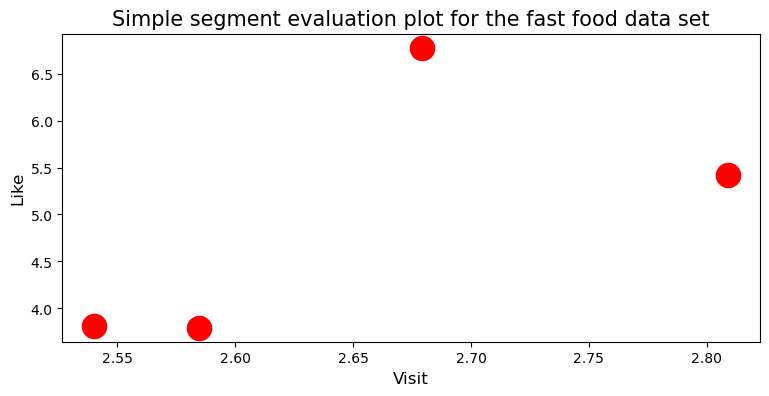

In [25]:
import seaborn as sns
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()